# Min Ah Kim final project 
# Affect of inflation of minimum wage

# Abstract
Even though the minimum wage has increased along with inflation, it is clear that real value of our wages have decreased overtime. 
Using data collected from the deparment of labor statistics it shows us that the value of a $15 minimum wage is only worth about $8 in 2010 indicating a over a 50% decline in value


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


import pandas library and plt for visualization graph, seaborn helps explore and understand the data

In [2]:
# read minimumwage csv file
minwagedf = pd.read_csv("MinWage.csv",encoding="ISO-8859-1")

In [3]:
# read inflation csv file
infdf = pd.read_csv("inflation.csv")

In [4]:
#check if the data displayed 
infdf.head()

,Yearmon,CPI
0,01-01-1913,9.8
1,01-02-1913,9.8
2,01-03-1913,9.8
3,01-04-1913,9.8
4,01-05-1913,9.7


In [5]:
#check datatype 
#Yearmon - datatype(object), couldnt bring the values
infdf.dtypes


Yearmon     object
CPI        float64
dtype: object

In [6]:

# had to convert it to datatime
# now yearmon datatype shown as datetime
infdf['Yearmon'] = pd.to_datetime(infdf['Yearmon'])

infdf.dtypes


Yearmon    datetime64[ns]
CPI               float64
dtype: object

In [7]:
#get yearmon values which bigger than 2010 
infdf =infdf[infdf['Yearmon'] > '01-01-2010']
infdf.Yearmon.unique()
 

array(['2010-01-02T00:00:00.000000000', '2010-01-03T00:00:00.000000000',
       '2010-01-04T00:00:00.000000000', '2010-01-05T00:00:00.000000000',
       '2010-01-06T00:00:00.000000000', '2010-01-07T00:00:00.000000000',
       '2010-01-08T00:00:00.000000000', '2010-01-09T00:00:00.000000000',
       '2010-01-10T00:00:00.000000000', '2010-01-11T00:00:00.000000000',
       '2010-01-12T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2011-01-02T00:00:00.000000000', '2011-01-03T00:00:00.000000000',
       '2011-01-04T00:00:00.000000000', '2011-01-05T00:00:00.000000000',
       '2011-01-06T00:00:00.000000000', '2011-01-07T00:00:00.000000000',
       '2011-01-08T00:00:00.000000000', '2011-01-09T00:00:00.000000000',
       '2011-01-10T00:00:00.000000000', '2011-01-11T00:00:00.000000000',
       '2011-01-12T00:00:00.000000000', '2012-01-01T00:00:00.000000000',
       '2012-01-02T00:00:00.000000000', '2012-01-03T00:00:00.000000000',
       '2012-01-04T00:00:00.000000000', '2012-01-05

In [8]:
# check yearmon(>2010) and cpi values
YearandCPI=infdf[["Yearmon","CPI"]]
YearandCPI


,Yearmon,CPI
1165,2010-01-02,216.741
1166,2010-01-03,217.631
1167,2010-01-04,218.009
1168,2010-01-05,218.178
1169,2010-01-06,217.965
...,...,...
1298,2021-01-03,264.877
1299,2021-01-04,267.054
1300,2021-01-05,269.195
1301,2021-01-06,271.696


In [9]:
#store yearmon values on Years_CPI varaible
Years_CPI = YearandCPI["Yearmon"].values
Years_CPI

array(['2010-01-02T00:00:00.000000000', '2010-01-03T00:00:00.000000000',
       '2010-01-04T00:00:00.000000000', '2010-01-05T00:00:00.000000000',
       '2010-01-06T00:00:00.000000000', '2010-01-07T00:00:00.000000000',
       '2010-01-08T00:00:00.000000000', '2010-01-09T00:00:00.000000000',
       '2010-01-10T00:00:00.000000000', '2010-01-11T00:00:00.000000000',
       '2010-01-12T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2011-01-02T00:00:00.000000000', '2011-01-03T00:00:00.000000000',
       '2011-01-04T00:00:00.000000000', '2011-01-05T00:00:00.000000000',
       '2011-01-06T00:00:00.000000000', '2011-01-07T00:00:00.000000000',
       '2011-01-08T00:00:00.000000000', '2011-01-09T00:00:00.000000000',
       '2011-01-10T00:00:00.000000000', '2011-01-11T00:00:00.000000000',
       '2011-01-12T00:00:00.000000000', '2012-01-01T00:00:00.000000000',
       '2012-01-02T00:00:00.000000000', '2012-01-03T00:00:00.000000000',
       '2012-01-04T00:00:00.000000000', '2012-01-05

In [10]:
#store cpi values on CPI_values
CPI_values = YearandCPI["CPI"].values
CPI_values

array([216.741, 217.631, 218.009, 218.178, 217.965, 218.011, 218.312,
       218.439, 218.711, 218.803, 219.179, 220.223, 221.309, 223.467,
       224.906, 225.964, 225.722, 225.922, 226.545, 226.889, 226.421,
       226.23 , 225.672, 226.665, 227.663, 229.392, 230.085, 229.815,
       229.478, 229.104, 230.379, 231.407, 231.317, 230.221, 229.601,
       230.28 , 232.166, 232.773, 232.531, 232.945, 233.504, 233.596,
       233.877, 234.149, 233.546, 233.069, 233.049, 233.916, 234.781,
       236.293, 237.072, 237.9  , 238.343, 238.25 , 237.852, 238.031,
       237.433, 236.151, 234.812, 233.707, 234.722, 236.119, 236.599,
       237.805, 238.638, 238.654, 238.316, 237.945, 237.838, 237.336,
       236.525, 236.916, 237.111, 238.132, 239.261, 240.229, 241.018,
       240.628, 240.849, 241.428, 241.729, 241.353, 241.432, 242.839,
       243.603, 243.801, 244.524, 244.733, 244.955, 244.786, 245.519,
       246.819, 246.663, 246.669, 246.524, 247.867, 248.991, 249.554,
       250.546, 251.

### cleaning up the data (getting only one unique each year) 

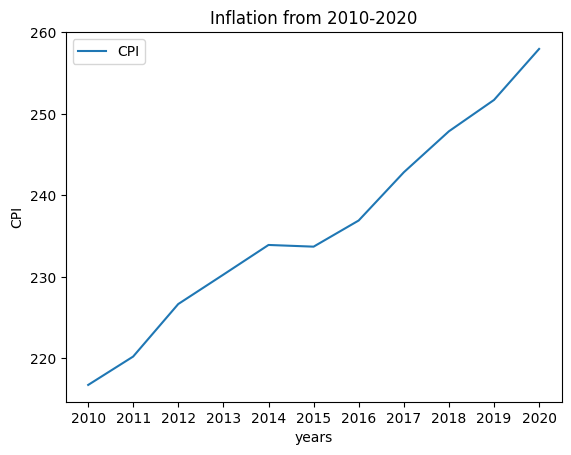

In [11]:
#have 5 same years so graph would look ugly 
#had to choose one year to get nice graph
years = []
Selected_CPI_values = []
Inf_values = []
Inf_years = []
X = pd.to_datetime(Years_CPI)
for idx, x in enumerate(X): # goes through Years_CPI and CPI_values at the same index and get index and year value of date at first
    year = x.year
    if year not in Inf_years:
        years.append(x)
        Selected_CPI_values.append(CPI_values[idx])
        Inf_years.append(year)
# years exist from 2010- 2021 
plt.plot(years[:-1], Selected_CPI_values[:-1], label="CPI")
plt.xlabel("years")
plt.ylabel("CPI")
plt.title("Inflation from 2010-2020")
plt.legend()
plt.show()

### graph shown the inflation from 2010 to 2020. we can see that its keep going up every year
CPI is called consumer price index which means it measures the average cost of buying stuff every year.
people compare cpi of an year to other to see if inflation is high.


### start with minimum wage csv file 

In [12]:
minwagedf.head()

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,...,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8,2.1,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65(b),1.65000,12.26,1.65000,12.26,(b)


In [13]:
minwagedf.Year

0       1968
1       1968
2       1968
3       1968
4       1968
        ... 
2857    2020
2858    2020
2859    2020
2860    2020
2861    2020
Name: Year, Length: 2862, dtype: int64

In [14]:
#getting New york values only and >2010 
minwagedNY = minwagedf[(minwagedf["Year"]>=2010) & (minwagedf["State"]=="New York")]

minwagedNY
 

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
2301,2010,New York,7.25,8.60,7.25,8.60,7.25,8.60,218.056,7.25,7.25,8.60,7.25,8.60,NaN
2355,2011,New York,7.25,8.34,7.25,8.34,7.25,8.34,224.939,7.25,7.25,8.34,7.25,8.34,NaN
2409,2012,New York,7.25,8.17,7.25,8.17,7.25,8.17,229.594,7.25,7.25,8.17,7.25,8.17,NaN
2463,2013,New York,7.25,8.05,7.25,8.05,7.25,8.05,232.957,7.25,7.25,8.05,7.25,8.05,NaN
2517,2014,New York,8.00,8.74,7.25,7.92,8.00,8.74,236.736,8,8.00,8.74,8.00,8.74,NaN
2571,2015,New York,8.75,9.55,7.25,7.91,8.75,9.55,237.017,8.75,8.75,9.55,8.75,9.55,NaN
2625,2016,New York,9.00,9.70,7.25,7.81,9.00,9.70,240.007,9,9.00,9.70,9.00,9.70,NaN
2679,2017,New York,9.70,10.24,7.25,7.65,9.70,10.24,245.120,9.7,9.70,10.24,9.70,10.24,NaN
2733,2018,New York,10.40,10.71,7.25,7.47,10.40,10.71,251.107,10.4,10.40,10.71,10.40,10.71,NaN
2787,2019,New York,11.80,11.94,7.25,7.34,11.80,11.94,255.657,11.8,11.80,11.94,11.80,11.94,NaN


In [15]:
list(minwagedNY.columns)

['Year',
 'State',
 'State.Minimum.Wage',
 'State.Minimum.Wage.2020.Dollars',
 'Federal.Minimum.Wage',
 'Federal.Minimum.Wage.2020.Dollars',
 'Effective.Minimum.Wage',
 'Effective.Minimum.Wage.2020.Dollars',
 'CPI.Average',
 'Department.Of.Labor.Uncleaned.Data',
 'Department.Of.Labor.Cleaned.Low.Value',
 'Department.Of.Labor.Cleaned.Low.Value.2020.Dollars',
 'Department.Of.Labor.Cleaned.High.Value',
 'Department.Of.Labor.Cleaned.High.Value.2020.Dollars',
 'Footnote']

In [16]:
minwagedNY.drop(["Department.Of.Labor.Uncleaned.Data","Department.Of.Labor.Cleaned.Low.Value","Department.Of.Labor.Cleaned.Low.Value.2020.Dollars", 
"Department.Of.Labor.Cleaned.Low.Value.2020.Dollars","Department.Of.Labor.Cleaned.High.Value","Department.Of.Labor.Cleaned.High.Value.2020.Dollars", 
"Footnote"], axis=1,inplace=True)

minwagedNY.head()
#drop unnecesaeey columms head

/var/folders/ns/z77kcwn53pg91qp29pzq71wm0000gn/T/ipykernel_48844/1455119150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minwagedNY.drop(["Department.Of.Labor.Uncleaned.Data","Department.Of.Labor.Cleaned.Low.Value","Department.Of.Labor.Cleaned.Low.Value.2020.Dollars",


,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average
2301,2010,New York,7.25,8.60,7.25,8.60,7.25,8.60,218.056
2355,2011,New York,7.25,8.34,7.25,8.34,7.25,8.34,224.939
2409,2012,New York,7.25,8.17,7.25,8.17,7.25,8.17,229.594
2463,2013,New York,7.25,8.05,7.25,8.05,7.25,8.05,232.957
2517,2014,New York,8.00,8.74,7.25,7.92,8.00,8.74,236.736


In [17]:
df1=minwagedNY[["Year","Federal.Minimum.Wage.2020.Dollars"]]
df1

,Year,Federal.Minimum.Wage.2020.Dollars
2301,2010,8.60
2355,2011,8.34
2409,2012,8.17
2463,2013,8.05
2517,2014,7.92
2571,2015,7.91
2625,2016,7.81
2679,2017,7.65
2733,2018,7.47
2787,2019,7.34


In [18]:
NYyear= df1["Year"].values
NYyear.shape

(11,)

In [19]:
NYmin = df1["Federal.Minimum.Wage.2020.Dollars"].values
NYmin.shape

(11,)

In [20]:
df2 = minwagedNY[["Year","Federal.Minimum.Wage"]]
NYyear2 = df2["Year"].values
NYmin2 = df2["Federal.Minimum.Wage"].values
NYmin2

array([7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25])

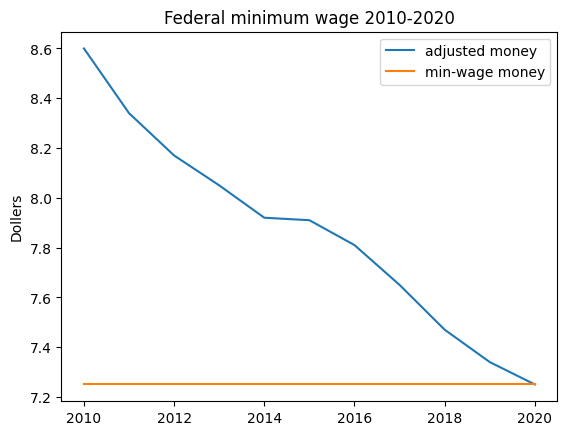

In [21]:
plt.plot(NYyear,NYmin,label = "adjusted money")
plt.plot(NYyear2,NYmin2,label = "min-wage money")
plt.title("Federal minimum wage 2010-2020")
plt.ylabel("Dollers")
plt.legend()
plt.show()

### graph shown that the minimum wage in NY from 2010 - 2020 is going down. 
 

**Real wage is the amount of money you make adjust for inflation and nominal wage is the wage the current pays you. 
After adding in inflation the real wage is going down.
Even tho you get paid 15 today, it buys you less than 8 now compare to 2010 




the blue line shows the real value of money for inflation. In 2010 the value of $7.25 was able to buy $8.6 for goods but by 2020 the value fell by $1.35 indicating a 18.6% decrease in value. Eventhough your still make the same amount of money nominally your real wage is less.

In [22]:
CPImin = minwagedNY[["CPI.Average","Year"]]
CPImin

,CPI.Average,Year
2301,218.056,2010
2355,224.939,2011
2409,229.594,2012
2463,232.957,2013
2517,236.736,2014
2571,237.017,2015
2625,240.007,2016
2679,245.120,2017
2733,251.107,2018
2787,255.657,2019


In [23]:
test = minwagedf[minwagedf.Year == 2020]

test.head()

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
2808,2020,Alabama,0.00,0.00,7.25,7.25,7.25,7.25,258.66,...,0.00,0.00,0.00,0.00,NaN
2809,2020,Alaska,10.19,10.19,7.25,7.25,10.19,10.19,258.66,10.19,10.19,10.19,10.19,10.19,NaN
2810,2020,Arizona,12.00,12.00,7.25,7.25,12.00,12.00,258.66,12,12.00,12.00,12.00,12.00,NaN
2811,2020,Arkansas,10.00,10.00,7.25,7.25,10.00,10.00,258.66,10,10.00,10.00,10.00,10.00,NaN
2812,2020,California,13.00,13.00,7.25,7.25,13.00,13.00,258.66,13,13.00,13.00,13.00,13.00,NaN


In [24]:
test.State.count()

54

In [25]:
# convert state name from full name to 2 letters
def convert(state):
    us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
    }

    val = us_state_to_abbrev[state]
    return val

new_ab = []
for state in test.State:
    new_ab.append(convert(state))

test['State'] = new_ab

/var/folders/ns/z77kcwn53pg91qp29pzq71wm0000gn/T/ipykernel_48844/675756926.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['State'] = new_ab


In [26]:
#state name became 2 letters
test

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
2808,2020,AL,0.00,0.00,7.25,7.25,7.25,7.25,258.66,...,0.00,0.00,0.00,0.00,NaN
2809,2020,AK,10.19,10.19,7.25,7.25,10.19,10.19,258.66,10.19,10.19,10.19,10.19,10.19,NaN
2810,2020,AZ,12.00,12.00,7.25,7.25,12.00,12.00,258.66,12,12.00,12.00,12.00,12.00,NaN
2811,2020,AR,10.00,10.00,7.25,7.25,10.00,10.00,258.66,10,10.00,10.00,10.00,10.00,NaN
2812,2020,CA,13.00,13.00,7.25,7.25,13.00,13.00,258.66,13,13.00,13.00,13.00,13.00,NaN
2813,2020,CO,12.00,12.00,7.25,7.25,12.00,12.00,258.66,12,12.00,12.00,12.00,12.00,NaN
2814,2020,CT,11.00,11.00,7.25,7.25,11.00,11.00,258.66,11,11.00,11.00,11.00,11.00,NaN
2815,2020,DE,9.25,9.25,7.25,7.25,9.25,9.25,258.66,9.25,9.25,9.25,9.25,9.25,NaN
2816,2020,DC,14.00,14.00,7.25,7.25,14.00,14.00,258.66,14,14.00,14.00,14.00,14.00,NaN
2817,2020,FL,8.56,8.56,7.25,7.25,8.56,8.56,258.66,8.56,8.56,8.56,8.56,8.56,NaN


In [27]:
df = test[["State","Effective.Minimum.Wage"]]
df

,State,Effective.Minimum.Wage
2808,AL,7.25
2809,AK,10.19
2810,AZ,12.00
2811,AR,10.00
2812,CA,13.00
2813,CO,12.00
2814,CT,11.00
2815,DE,9.25
2816,DC,14.00
2817,FL,8.56


In [28]:
xaxis = df["State"].values
xaxis
yaxis=df["Effective.Minimum.Wage"].values
yaxis

array([ 7.25, 10.19, 12.  , 10.  , 13.  , 12.  , 11.  ,  9.25, 14.  ,
        8.56,  7.25,  8.25, 10.1 ,  7.25,  9.25,  7.25,  7.25,  7.25,
        7.25,  7.25, 12.  , 11.  , 12.75,  9.65,  8.15,  7.25,  9.45,
        8.65,  9.  ,  7.25,  7.25, 11.  ,  9.  , 11.8 ,  7.25,  7.25,
        8.7 ,  7.25, 11.25,  7.25,  7.25, 10.5 ,  7.25,  9.3 ,  7.25,
        7.25, 10.5 ,  7.25, 10.96,  7.25, 13.5 ,  8.75,  7.25,  7.25])

In [29]:
numState=len(xaxis)

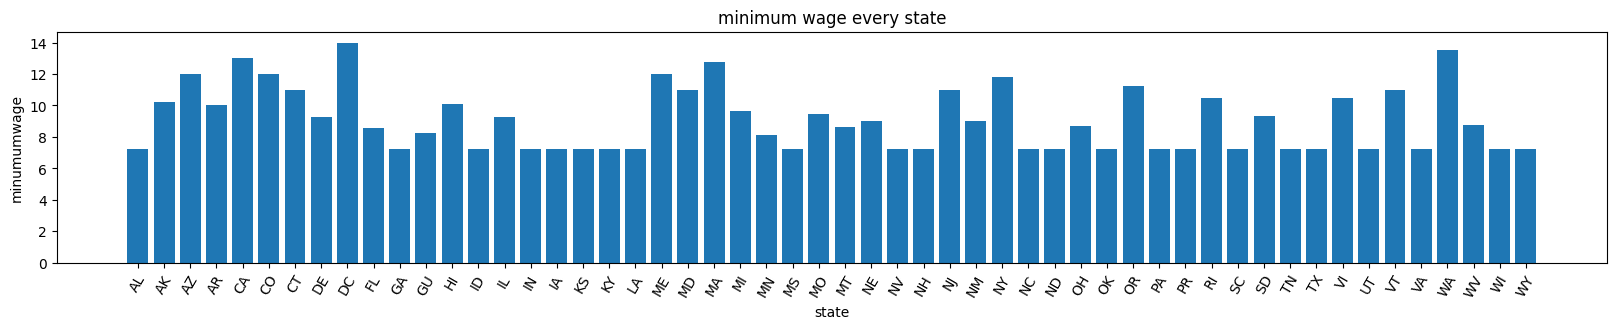

In [30]:
plt.figure(figsize=(20, 3)) 
#plt.bar( width=0.8, bottom=None, align='center', data=None)
 # width:20, height:3
plt.bar(xaxis,yaxis)
plt.xticks(xaxis, rotation=60)
plt.title('minimum wage every state')
plt.xlabel('state')
plt.ylabel('minumumwage')
plt.show()


Minimum wage every state bar graph

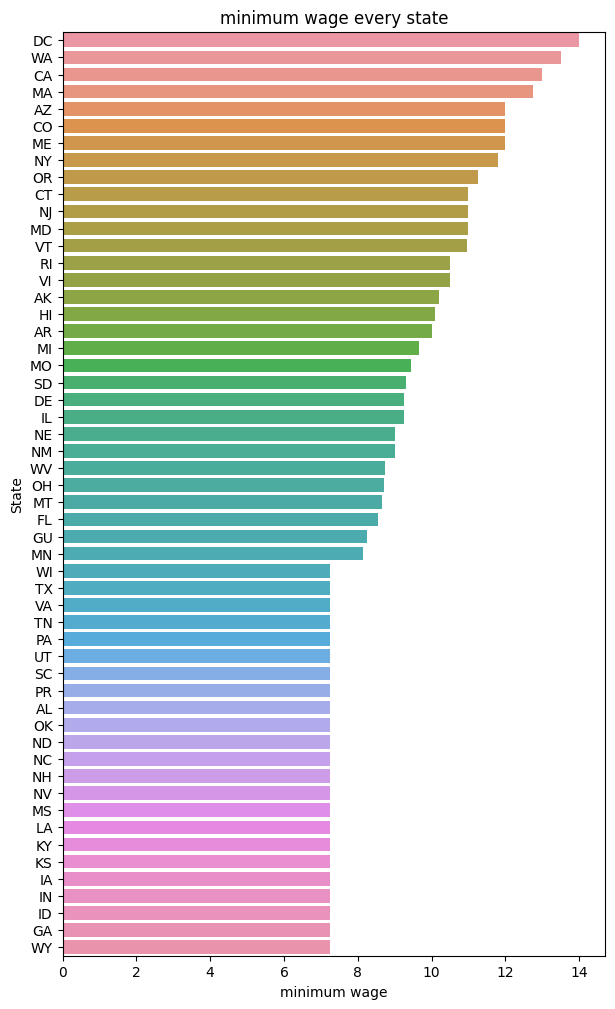

In [31]:
import seaborn as sns
test = pd.DataFrame(
    {
        "x": xaxis,
        "y": yaxis
        
    }
)
plt.figure(figsize=(7, 12)) 
sns.barplot(data=test.sort_values('y', ascending=False), y='x', x='y')
plt.title('minimum wage every state')
plt.xlabel('minimum wage')
plt.ylabel('State')
plt.show()

Effective Minimum wage every state

In [32]:
import plotly
import plotly.express as px


fig = px.choropleth(
                    df,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Effective.Minimum.Wage',
                   color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()

even thought the min wage increased along with inflation, the real value of money that you make today has actually went down year over year. 

# Conclusion
Conclusion: 
The increase in miniumum wage hasn't offset the rise of inflation thus lower income famlies are actual lower today than it was in 2010